In [9]:
# importing the required modules
import os
import geopandas as gpd
from glob import glob
import os.path

In [10]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: c:\Users\rensw\OneDrive - Universiteit Utrecht\GIMA\Thesis - Buitenland\Thesis\Data\Raw_data\M1


In [11]:
# create path
path_rawdata_canary = cwd + '/interim/M1_filtereddata_spain_canary_03112022/'
path_rawdata_mainland = cwd + '/interim/M1_filtereddata_spain_mainland_03112022/'

# filter on key:tag combination in datasets and skip dataset if now value could be found (df == empty)
for file in glob(path_rawdata_mainland + '*.shp'):
    file_name = os.path.basename(file)
    canary_file = path_rawdata_canary + file_name

    error_1 = path_rawdata_canary + 'highway_node.shp'
    error_2 = path_rawdata_canary + 'highway_way_1.shp'
    error_3 = path_rawdata_canary + 'place_way.shp'

    # Filter out datasets that are not existing for Canarian Islands
    if canary_file in [error_1, error_2, error_3]:
        print(file_name + ' --> does not exist for Canary Islands')
        
        # Read files that only exist for the Spain Mainland
        mainlandSrc = gpd.read_file(file)

        # Save datasets
        mainlandSrc.to_file(cwd + '/interim/' + 'M1_' + file_name)
        print('M1_' + file_name + ' --> saved without data of Canary Islands')
        #print(mainlandSrc)
        continue

    # Read and Merge shapefiles that exist for both the Spain Mainland and the Canary Islands
    else:
        # Read shapefiles of the Spanish Mainland and Canary Islands
        mainlandSrc = gpd.read_file(file)
        canarySrc = gpd.read_file(canary_file) 

        # Merge shapefiles
        new_shp = gpd.pd.concat([mainlandSrc, canarySrc])
        
        # Save datasets
        new_shp.to_file(cwd + '/interim/' + 'M1_' + file_name)
        print('M1_' + file_name + ' --> saved with data of Spain Mainland & Canary Islands')
        #print(new_shp)
        continue

c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_highway_area.shp --> saved with data of Spain Mainland & Canary Islands
highway_node.shp --> does not exist for Canary Islands
M1_highway_node.shp --> saved without data of Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_highway_way.shp --> saved with data of Spain Mainland & Canary Islands
highway_way_1.shp --> does not exist for Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_highway_way_1.shp --> saved without data of Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_leisure_area.shp --> saved with data of Spain Mainland & Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_leisure_node.shp --> saved with data of Spain Mainland & Canary Islands
M1_leisure_way.shp --> saved with data of Spain Mainland & Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


M1_place_area.shp --> saved with data of Spain Mainland & Canary Islands
M1_place_node.shp --> saved with data of Spain Mainland & Canary Islands
place_way.shp --> does not exist for Canary Islands
M1_place_way.shp --> saved without data of Canary Islands


c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\Users\rensw\miniconda3\envs\pcraster\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

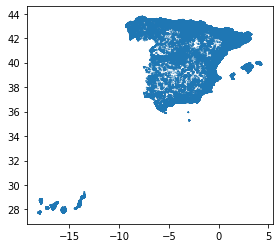

In [13]:
shp_roads = cwd + '/interim/M1_highway_way.shp'
shp = gpd.read_file(shp_roads)
shp.plot()
